# Otimização: Gradiente Estocástico

*Descrição da Tarefa:*

Escolha x_0 ∈ Rn; Defina k ← 0; Repita até que um critério de parada seja satisfeito: Gere yk sendo
realizações da variável aleatória y; Compute um vetor estocástico g(xk, yk); Defina xk+1 ← xk − αk g(xk, yk)
para algum αk > 0; k ← k + 1;

Reta escolhida como exemplo: $y = 2x + 10$

### Funções Auxiliares

In [1]:
import random
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

generate_line = lambda x: 2*x + 10

def generate_dots(n, y, border = 0.15):
    ans = []
    for _ in range(n):
        a = random.uniform(0,5)
        ans.append([a, generate_line(a)*(1.0+y*border+y*random.random()), y])
    
    return ans

### Gerando pontos

400 aleatórios, (200 up, 200 down)

In [2]:
n = 200
up = generate_dots(n, 1) # a cima da reta
down = generate_dots(n, -1) # abaixo da reta
dots = up
dots.extend(down)
dots = np.array(dots)
up = np.array(up)
down = np.array(down)

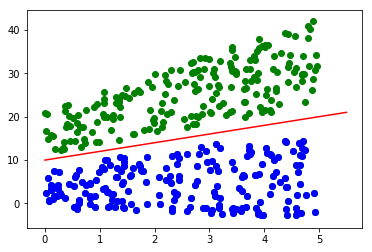

In [3]:
x = np.arange(0, 6, 0.5)
plt.plot(x, generate_line(x), c = "red")
plt.scatter(up[:,0], up[:,1], c='green')
plt.scatter(down[:,0], down[:,1], c = 'blue')

## SGD (implementação)

Aux:

In [4]:
lipschitz = lambda x, rho: 2*rho + (LA.norm(x, axis = 1)**2).sum()/x.shape[0]
gen_line = lambda w,b,x: x*(-w[0]/w[1]) + b/w[1]
get_line_string = lambda w,b: "y = {:.2f}x + {:.2f}".format((-w[0]/w[1])[0], (b/w[1])[0])

def plot_g(x, y, w, b):
    x_ = np.arange(0, 6, 0.5)
    plt.plot(x_, gen_line(w,b,x_), c = "blue")
    plt.scatter(x[:,0], x[:,1], c = y)
    
def get_grad(x, y, w, b, n):
    grads = []
    for i in n:
        temp = (1-y[i]*(w.T.dot(x[i,0:2])-b)[0])
        grads.append([-x[i,0]*2*y[i]*max(0,temp), -x[i,1]*2*y[i]*max(0,temp), 2*y[i]*max(0,temp)])
    return np.array(grads).sum(axis=0)/200

Implementação do Gradiente Estocástico:

In [5]:
def sgd(x, y, w, b, it = 500, rho = 0.05, batch_size = 30):
    alpha = 1/lipschitz(x, rho)
    
    for _ in range(it):
        batch = [random.randint(0, x.shape[0]-1) for _ in range(batch_size)]
        grad = get_grad(x, y, w, b, batch)
        w = (w.T-alpha*(grad[0:2]+2*rho*w.T)).T
        b = b - alpha*(grad[2])
    return w, b

## Experimentos:

Reta Inicial
y = -0.17x + 0.50


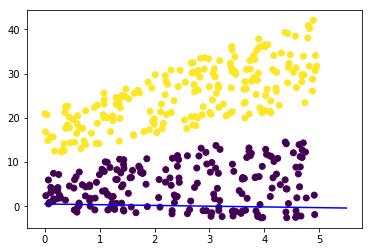

In [6]:
x = dots[:,0:2]
y = dots[:,2]
w = np.array([[1, 6]]).T
b = 3
print("Reta Inicial")
print(get_line_string(w,b))
plot_g(x,y,w,b)

y = 2.61x + 10.09


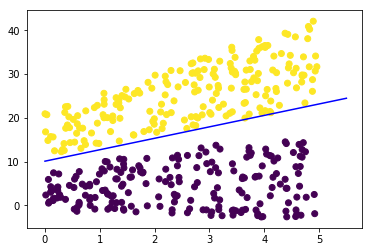

In [7]:
x = dots[:,0:2]
y = dots[:,2]
w = np.array([[-1, 60]]).T
b = 3
w, b = sgd(x,y,w,b, 7000, 0.05)
print(get_line_string(w,b))
plot_g(x,y,w,b)

## Comentários finais

O algoritmo conseguiu estimar uma reta ótima em relação aos pontos gerados. Dessa forma, observamos que a reta obtida é próxima a reta de referência. Em particular, observa-se que a escolha do rho é imprescindível para obter uma reta adequada.

Além disso, utilizar um número baixo de iterações faz com que o algoritmo não chegue a convergir. Porém, um número alto de iterações gera um esforço computacional adicional e, para estes dados, acaba não gerando uma reta tão interessante. Isso deve ocorrer devido sua interação com a função de perda utilizada (Hinge Loss) e a distribuição dos dados em ambos os lados da reta.